In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.callbacks import LearningRateScheduler
from sklearn.metrics import mean_squared_error

In [2]:
# Load Apple stock price data
data = pd.read_csv('data.csv')
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
dataset = data['Close'].values.reshape(-1, 1)

In [3]:
# Normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [4]:
# Split data into train and test sets
train_size = int(len(dataset) * 0.8)
train, test = dataset[:train_size], dataset[train_size:]

In [5]:
# Convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [6]:
# Reshape into X=t and Y=t+1
time_step = 100
X_train, y_train = create_dataset(train, time_step)
X_test, y_test = create_dataset(test, time_step)

In [7]:
# Reshape input to be [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


In [8]:
# LSTM Model with Increased Complexity
model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=250, batch_size=64, verbose=1)

Epoch 1/250
15/15 [==============================] - 13s 433ms/step - loss: 0.0516
Epoch 2/250
15/15 [==============================] - 8s 531ms/step - loss: 0.0068
Epoch 3/250
15/15 [==============================] - 7s 454ms/step - loss: 0.0026
Epoch 4/250
15/15 [==============================] - 8s 546ms/step - loss: 0.0019
Epoch 5/250
15/15 [==============================] - 8s 565ms/step - loss: 0.0016
Epoch 6/250
15/15 [==============================] - 6s 427ms/step - loss: 0.0016
Epoch 7/250
15/15 [==============================] - 8s 517ms/step - loss: 0.0016
Epoch 8/250
15/15 [==============================] - 6s 430ms/step - loss: 0.0016
Epoch 9/250
15/15 [==============================] - 8s 496ms/step - loss: 0.0015
Epoch 10/250
15/15 [==============================] - 8s 534ms/step - loss: 0.0015
Epoch 11/250
15/15 [==============================] - 6s 430ms/step - loss: 0.0016
Epoch 12/250
15/15 [==============================] - 8s 524ms/step - loss: 0.0018
Epoch 13/250

In [9]:
# Predictions
test_predict = model.predict(X_test)

5/5 [==============================] - 2s 70ms/step


In [10]:
# Inverse transform predictions
test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform([y_test])[0]

In [11]:
# Evaluate LSTM model
error = mean_squared_error(y_test, test_predict)
print('Mean Squared Error:', error)

Mean Squared Error: 5.23071303192644


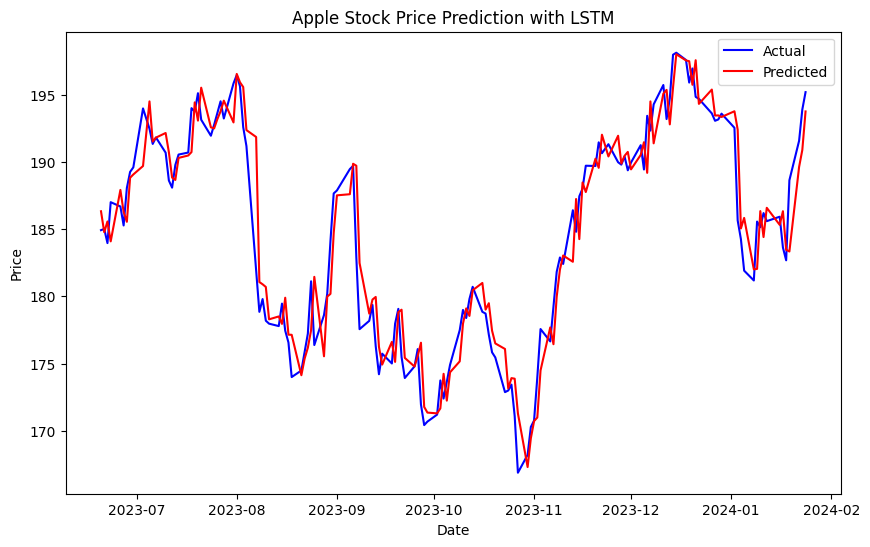

In [12]:
# Visualize predictions
plt.figure(figsize=(10, 6))
plt.plot(data.index[-len(y_test):], y_test, color='blue', label='Actual')
plt.plot(data.index[-len(test_predict):], test_predict, color='red', label='Predicted')
plt.title('Apple Stock Price Prediction with LSTM')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()